# ML Tech Interview

Hello and welcome to the Machine Learning Tech Interview. This interview will be divided in two parts: the theoretical part and the practical/coding part. 

### **I will review only the scripts that will be sent (by pull request on this repo) by 1:00 pm**

Good Luck!!

## Theoretical Part

Please answer the following questions. 

#### What are the assumptions of a linear model (or any other type of model)?

- Little or no colinearity
- For linear - assume there is a linear type of relationship between the variables
- Homoscedacity - the residual from prediction is similar for all values of independant variable
- Normal distribution of error
- No autocorrelation

#### What’s the difference between K Nearest Neighbor and K-means Clustering?

Knn
- Supervised learning
- Classification algorithm
- Classify based on known measures
- Takes the nearest k points to classify points

K-means
- Unsupervised learning
- Clusertering algorithm
- Clusters points into k clusters based on distance from each other

#### How do you address overfitting?

- Increase data - 10k-100k for nonlinear ML models / millions for deep learning
- Reduce features - especially ones less related to outcome
- Dimensionality reduction with PCA
- Regularization

#### Explain Naive Bayes algorithms.

- It is based on the Bayes theorem which assumes that the outcome of a certain feature is independant of another feature.
- Given this, the algorithm can calculate the probability of a certain sample to be of a certain category

#### When do you use an AUC-ROC score? What kind of information can you gather from it?

- The score helps determine how well the model is at predicting the different classifications.
- One use case would be to understand how well it is at distinguishing between those with / without health issues.
- From this we can gather the number of true / false negatives and positives.

#### What is cross validation?

- Splitting the training data into subsections to fit the model numerous times to be able to generalize the outcome better for out of sample data.
- Helps prevent overfitting and underfitting as well

#### What are confounding variables?

- Any variable that confuses the relationship between the independant and dependant variables.

#### If an important metric for our company stopped appearing in our data source, how would you investigate the causes?

- One way would be to see if it can be inferred from other features - somehow it's broken up to smaller components or is a byproduct of another feature.
- Another way would be to see if it's been separated into a different data source.

## Practical Machine Learning

In this challenge, you will showcase your knowledge in feature engineering, dimensionality reduction, model selection and evaluation, hyperparameter tuning, and any other techniques of machine learning.

There isn't a correct solution to this challenge. All we would like to learn is your thinking process that demonstrates your knowledge, experience, and creativity in developing machine learning models. Therefore, in addition to developing the model and optimizing its performance, you should also elaborate your thinking process and justify your decisions thoughout the iterative problem-solving process.

The suggested time to spend on this challenge is 90-120 minutes. If you don't have time to finish all the tasks you plan to do, simply document the to-dos at the end of your response.

#### Instructions:

- Download the housing prices data set (housing_prices.csv). The data is big enough to showcase your thoughts but not so that processing power will be a problem.
- Using Python, analyze the features and determine which feature set to select for modeling.
- Train and cross validate several regression models, attempting to accurately predict the SalePrice target variable.
- Evaluate all models and show comparison of performance metrics.
- State your thoughts on model performance, which model(s) you would select, and why.

#### Deliverables Checklist:

- Python code.
- Your thinking process.
- The features selected for machine learning.
- The results (e.g., performance metrics) of your selected model(s).

In [6]:
import pandas as pd
import numpy as np
from sklearn.feature_selection import RFE

In [74]:
housing = pd.read_csv('housing_prices.csv')
housing.dtypes
housing.shape

(1460, 81)

### MISSING VALUES

In [75]:
null_cutoff = housing.shape[0] * 0.1
housing.isna().sum().sort_values(ascending = False) > null_cutoff
housing = housing.drop(['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu', 'LotFrontage'], axis = 1)
#housing.isna().sum().sort_values(ascending = False)

In [76]:
housing['BsmtQual'].dtypes

dtype('O')

In [77]:
housing[['GarageType', 'GarageFinish', 'GarageCond', 'GarageQual']] = housing[['GarageType', 'GarageFinish', 'GarageCond', 'GarageQual']].fillna('No Garage')
housing['GarageYrBlt'] = housing['GarageYrBlt'].fillna(0)
housing[['BsmtExposure', 'BsmtFinType2', 'BsmtFinType1', 'BsmtCond', 'BsmtQual']] = housing[['BsmtExposure', 'BsmtFinType2', 'BsmtFinType1', 'BsmtCond', 'BsmtQual']].fillna('No Basement')
housing.isna().sum().sort_values(ascending = False)

MasVnrType       8
MasVnrArea       8
Electrical       1
SalePrice        0
Foundation       0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
ExterQual        0
ExterCond        0
BsmtQual         0
TotalBsmtSF      0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinSF1       0
BsmtFinType2     0
BsmtFinSF2       0
RoofStyle        0
YearRemodAdd     0
YearBuilt        0
OverallCond      0
MSSubClass       0
MSZoning         0
LotArea          0
Street           0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
                ..
PavedDrive       0
WoodDeckSF       0
OpenPorchSF      0
EnclosedPorch    0
3SsnPorch        0
ScreenPorch      0
PoolArea         0
MiscVal          0
MoSold           0
YrSold           0
SaleType         0
GarageFinish     0
GarageYrBlt      0
GarageType       0
BsmtHalfBath     0
CentralAir       0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
FullBath    

In [78]:
housing.dropna(axis = 0, inplace = True)
housing.shape

(1451, 75)

In [79]:
housing.isna().sum()

Id               0
MSSubClass       0
MSZoning         0
LotArea          0
Street           0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
MasVnrArea       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
                ..
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
KitchenQual      0
TotRmsAbvGrd     0
Functional       0
Fireplaces       0
GarageType       0
GarageYrBlt      0
GarageFinish     0
GarageCars       0
GarageArea       0
GarageQual       0
GarageCond       0
PavedDrive       0
WoodDeckSF       0
OpenPorchSF      0
EnclosedPorch    0
3SsnPorch   

### TO NUMERIC

In [81]:
housing.dtypes.value_counts()

object     38
int64      35
float64     2
dtype: int64

In [88]:
cat_cols = housing.select_dtypes(include = ['object']).columns
cat_cols

Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond',
       'PavedDrive', 'SaleType', 'SaleCondition'],
      dtype='object')

In [90]:
cat_uniques = [(x, housing[x].unique()) for x in cat_cols]
cat_uniques

[('MSZoning', array(['RL', 'RM', 'C (all)', 'FV', 'RH'], dtype=object)),
 ('Street', array(['Pave', 'Grvl'], dtype=object)),
 ('LotShape', array(['Reg', 'IR1', 'IR2', 'IR3'], dtype=object)),
 ('LandContour', array(['Lvl', 'Bnk', 'Low', 'HLS'], dtype=object)),
 ('Utilities', array(['AllPub', 'NoSeWa'], dtype=object)),
 ('LotConfig',
  array(['Inside', 'FR2', 'Corner', 'CulDSac', 'FR3'], dtype=object)),
 ('LandSlope', array(['Gtl', 'Mod', 'Sev'], dtype=object)),
 ('Neighborhood',
  array(['CollgCr', 'Veenker', 'Crawfor', 'NoRidge', 'Mitchel', 'Somerst',
         'NWAmes', 'OldTown', 'BrkSide', 'Sawyer', 'NridgHt', 'NAmes',
         'SawyerW', 'IDOTRR', 'MeadowV', 'Edwards', 'Timber', 'Gilbert',
         'StoneBr', 'ClearCr', 'NPkVill', 'Blmngtn', 'BrDale', 'SWISU',
         'Blueste'], dtype=object)),
 ('Condition1',
  array(['Norm', 'Feedr', 'PosN', 'Artery', 'RRAe', 'RRNn', 'RRAn', 'PosA',
         'RRNe'], dtype=object)),
 ('Condition2',
  array(['Norm', 'Artery', 'RRNn', 'Feedr', 'Po

In [95]:
housing = housing[housing.select_dtypes(include = ['int64', 'float64']).columns]
housing.shape

(1451, 37)

### COLINEARITY

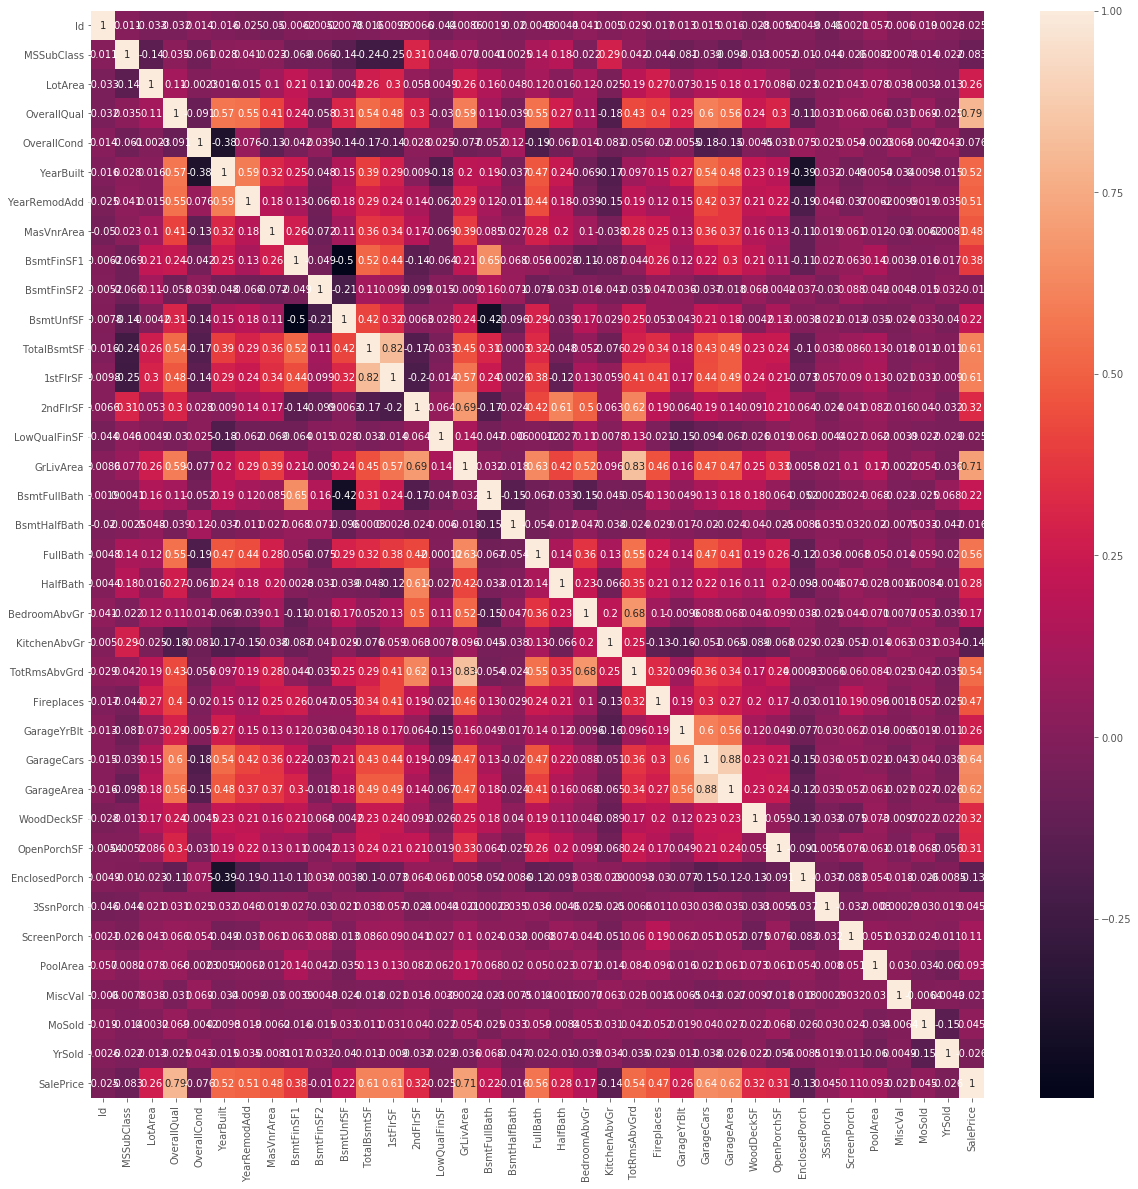

In [98]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('ggplot')

fig = plt.subplots(figsize = (20,20))
sns.heatmap(housing.corr(), annot = True)

### DISTRIBUTION

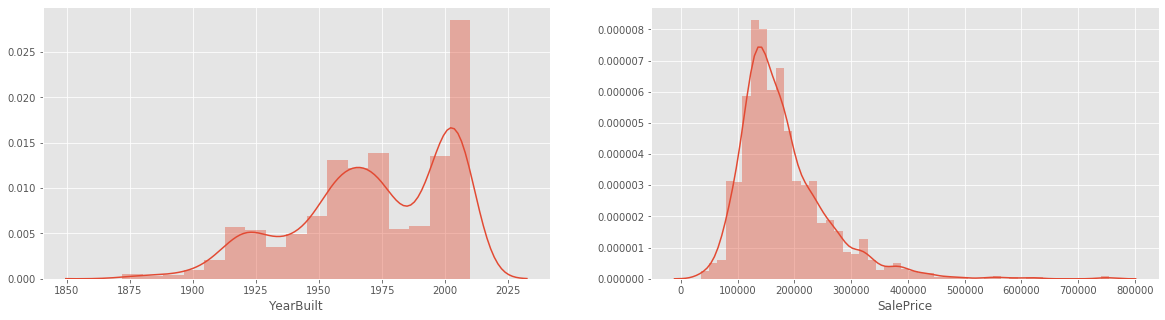

In [127]:
fig, axs = plt.subplots(1,2, figsize = (20,5))
sns.distplot(housing['YearBuilt'], ax = axs[0])
sns.distplot(housing['SalePrice'], ax = axs[1])

In [215]:
y = housing['SalePrice']
X = housing[['OverallQual', 'GarageArea', '1stFlrSF', 'YearBuilt', 'TotRmsAbvGrd']]

y = np.log(housing['SalePrice'])
X['YearBuilt_log'] = np.log(X['YearBuilt'])
X = X.drop('YearBuilt', axis = 1)

C:\Users\dandoye\Anaconda3\envs\ironhack\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


### MODEL

In [216]:
housing.head()

,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,8450,7,5,2003,2003,196.0,706,0,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,9600,6,8,1976,1976,0.0,978,0,...,298,0,0,0,0,0,0,5,2007,181500
2,3,60,11250,7,5,2001,2002,162.0,486,0,...,0,42,0,0,0,0,0,9,2008,223500
3,4,70,9550,7,5,1915,1970,0.0,216,0,...,0,35,272,0,0,0,0,2,2006,140000
4,5,60,14260,8,5,2000,2000,350.0,655,0,...,192,84,0,0,0,0,0,12,2008,250000


In [217]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

In [218]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
model = LinearRegression().fit(X_train, y_train)
y_pred = model.predict(X_test)
print(r2_score(y_pred, y_test))
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

0.7450805034122645
0.19796765849669115


##### RFE FEATURES

In [214]:
from sklearn.feature_selection import RFE

y = np.log(housing['SalePrice'])
X = housing.drop(['Id', 'GarageCars', 'GrLivArea'], axis = 1)

rfe_selector = RFE(estimator=LinearRegression(), n_features_to_select=5)#, step=5)
rfe_selector.fit(X, y)
rfe_support = rfe_selector.get_support()
rfe_feature = X.loc[:,rfe_support].columns.tolist()
print(str(len(rfe_feature)), 'selected features')
print(rfe_feature)

y = np.log(housing['SalePrice'])
X = housing[rfe_feature]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
model = LinearRegression().fit(X_train, y_train)
y_pred = model.predict(X_test)
print(r2_score(y_pred, y_test))
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

5 selected features
['OverallQual', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'Fireplaces']
0.6564686790135417
0.213623140412718


### IMPROVE ORIGINAL

In [221]:
y = housing['SalePrice']
X = housing[['OverallQual', 'GarageArea', '1stFlrSF', 'YearBuilt', 'TotRmsAbvGrd']]

y = np.log(housing['SalePrice'])
X['YearBuilt_log'] = np.log(X['YearBuilt'])
X = X.drop('YearBuilt', axis = 1)

C:\Users\dandoye\Anaconda3\envs\ironhack\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


In [226]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn import metrics

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.15)


steps = [
    ('scalar', StandardScaler()),
    ('poly', PolynomialFeatures(degree=2)),
    ('model', LinearRegression())
]

pipeline = Pipeline(steps)

pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)
print(r2_score(y_pred, y_test))
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

0.7834134797516398
0.16671962435710716
